In [1]:
#import data
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Data prepare
数据预处理

In [2]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print("Training data shape: ", X_train.shape)
print("Training labels shape: ", y_train.shape)
print("Test data shape: ", X_test.shape)
print("Test labels shape: ", y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


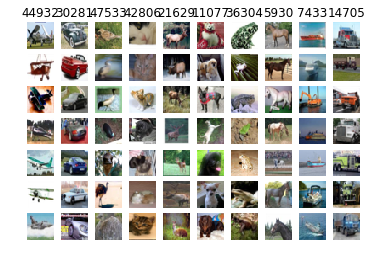

In [3]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
sample_num_cls = 7

for y,cls_name in enumerate(classes):
    name_idxs = np.flatnonzero(y_train == y)
    name_idxs_rdm = np.random.choice(name_idxs, size=sample_num_cls, replace=False)
    for i, cls_name_index in enumerate(name_idxs_rdm):
        plt_idx = i*num_classes+y+1
        plt.subplot(sample_num_cls, num_classes, plt_idx)
        plt.imshow(X_train[cls_name_index].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name_index)
    
plt.show()

In [4]:
# Split the data into train, val, and test sets. In addition we will
# create a small development set as a subset of the training data;
# we can use this for development so our code runs faster.
# trian: 为了训练
# val:   为了训练时候的验证,看起准确率,找到最准确的那个svm
# test:  仅仅在测试时候使用.
# dev:   临时测试不同svm loss的性能时候使用.

num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

# Our validation set will be num_validation points from the original
# training set.
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original
# training set.
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# We will also make a development set, which is a small subset of
# the training set.
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# We use the first num_test points of the original test set as our
# test set.
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

print("Train data shape: ", X_train.shape)
print("Train labels shape: ", y_train.shape)
print("Validation data shape: ", X_val.shape)
print("Validation labels shape: ", y_val.shape)
print("Test data shape: ", X_test.shape)
print("Test labels shape: ", y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


In [5]:
# 把照片拉成一行. 32x32x3的变成1行,这样每行都是一副图片.
X_train = np.reshape(X_train, (X_train.shape[0],-1)) # 列不关心
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0],-1))
X_dev = np.reshape(X_dev, (X_dev.shape[0],-1))
print("Train data shape: ", X_train.shape)
print("Validation data shape: ", X_val.shape)
print("Test data shape: ", X_test.shape)
print("Dev data shape: ", X_dev.shape)


Train data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (1000, 3072)
Dev data shape:  (500, 3072)


[ 130.64189796  135.98173469  132.47391837  130.05569388  135.34804082
  131.75402041  130.96055102  136.14328571  132.47636735  131.48467347
  136.58542857  132.78293878  132.094       137.14008163  133.177
  132.76759184  137.77767347  133.70602041  133.29373469  138.21244898]


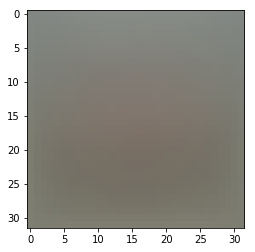

In [6]:
# 在每列上都找到该列的均值.我们一共有num个图像,每个图像的相同位置的像素的均值.会形成一个均值
# 的图像.
mean_image = np.mean(X_train, axis=0)
print(mean_image[:20]) #打印前20个看看
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8'))
plt.show()
#所有的减去这个均值图像
X_train = X_train - mean_image
X_test  = X_test - mean_image
X_val   = X_val - mean_image
X_dev   = X_dev - mean_image


In [7]:
# 可以把偏执bias加到图像中,作为一行的最后一个列元素.
X_train = np.hstack([X_train, np.ones((X_train.shape[0],1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0],1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0],1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0],1))])

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)


## SVM Classifier
具体的svm分类器在linear_classfier.ipynb上实现.

### 引用其他函数
只能对py文件的函数做引用,ipynb格式的函数是不能`from module1 import func1`的.

In [12]:
from nnlib.linear_svm_loss import *
import time

In [22]:
# input: num_trainx3073
# W    :3073x10
W = np.random.randn(X_train.shape[1],10)*0.001
print("W.shape",W.shape)

W.shape (3073, 10)


In [33]:
tic = time.time()
loss, dw = msvm_loss_native(W, X_dev, y_dev, reg=0.01,deltaD=1)
toc = time.time()
cost_native = toc - tic
print("loss,dw shape", loss,dw.shape)
print("dw", dw)
print("time cost:  ",cost_native)

loss,dw shape 23.5150127257 (3073, 10)
dw [[ -1.66225642e+01   1.02074964e+01  -1.29796408e+01 ...,   2.66685336e+01
   -5.75681733e+00  -1.64823696e+01]
 [ -2.61879142e+01   7.65666015e+00  -1.37198072e+01 ...,   2.79689775e+01
   -8.51866350e+00  -2.09197520e+01]
 [ -4.37518971e+01   4.82907694e+00  -1.29590046e+01 ...,   3.63066570e+01
   -1.41982684e+01  -3.40724997e+01]
 ..., 
 [ -1.15574516e+01   1.64897876e+01  -3.36626190e+00 ...,  -1.43549007e+01
    1.24331138e+01  -5.52925858e+00]
 [ -2.31735999e+01   8.16957194e+00  -4.32191459e+00 ...,  -9.89663783e-01
    3.99328209e+00  -7.56565097e+00]
 [  3.99464615e-03  -7.40132527e-02   2.30003015e-01 ...,  -1.65997269e-01
    1.82003643e-01  -9.60209498e-02]]
time cost:   0.045723676681518555


In [34]:
tic = time.time()
loss_v, dw_v = msvm_loss_vector(W, X_dev, y_dev, reg=0.01,deltaD=1)
toc = time.time()
cost_vector = toc - tic
print("loss,dw_v shape", loss_v,dw_v.shape)
print("dw_v", dw_v)
print("time cost:  ",cost_vector)

loss,dw_v shape 23.5150127257 (3073, 10)
dw_v [[ -1.66225642e+01   1.02074964e+01  -1.29796408e+01 ...,   2.66685336e+01
   -5.75681733e+00  -1.64823696e+01]
 [ -2.61879142e+01   7.65666015e+00  -1.37198072e+01 ...,   2.79689775e+01
   -8.51866350e+00  -2.09197520e+01]
 [ -4.37518971e+01   4.82907694e+00  -1.29590046e+01 ...,   3.63066570e+01
   -1.41982684e+01  -3.40724997e+01]
 ..., 
 [ -1.15574516e+01   1.64897876e+01  -3.36626190e+00 ...,  -1.43549007e+01
    1.24331138e+01  -5.52925858e+00]
 [ -2.31735999e+01   8.16957194e+00  -4.32191459e+00 ...,  -9.89663783e-01
    3.99328209e+00  -7.56565097e+00]
 [  3.99464615e-03  -7.40132527e-02   2.30003015e-01 ...,  -1.65997269e-01
    1.82003643e-01  -9.60209498e-02]]
time cost:   0.0060176849365234375


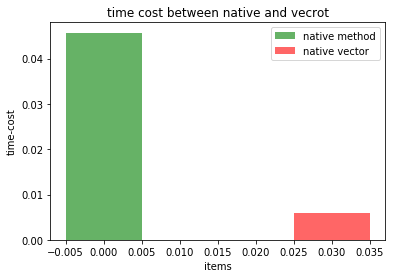

In [50]:
# 显示一下两个的耗时对比.
plt.bar(0,cost_native,color='g',width = .01,alpha=0.6,label='native method')
plt.bar(0.03,cost_vector,color='r',width = .01,alpha=0.6,label='native vector')
plt.xlabel('items')
plt.ylabel('time-cost')
plt.title('time cost between native and vecrot')
plt.legend(loc='upper right')
#plt.xticks(range(0,1),['native','vector'])

plt.show()

In [64]:
from nnlib.linear_classifiers import LinearSVM


In [65]:
svm = LinearSVM()
tic = time.time()
svm.train(X_train, y_train, learning_rate=1e-7, reg=5e4, 
          num_iterators=1500, batch_size=200, verbose=True)
toc = time.time()
print("cost ", (toc - tic))


iteration/allIterations, loss 0 1500 112877.33179
iteration/allIterations, loss 100 1500 2136871.85062
iteration/allIterations, loss 200 1500 1994805.31099


KeyboardInterrupt: 